In [8]:
%matplotlib inline

1. Object Creation

In [9]:
import numpy as np
import pandas as pd

# Creating a Series by passing a list of values, letting pandas create a default integer index
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [10]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.407099,0.875699,2.859656,0.440443
2013-01-02,-0.354482,-0.019630,-1.496352,-0.590188
2013-01-03,0.309865,-0.644700,1.025010,-1.157416
2013-01-04,0.346510,1.284926,-0.741549,0.710271
2013-01-05,-0.786194,-1.083996,2.081297,-0.075561
2013-01-06,-0.236866,0.826607,0.307731,0.636206


In [245]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3] * 4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [246]:
# The columns of the resulting DataFrame have different dtypes.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

2. Viewing Data

In [247]:
# Here is how to view the top and bottom rows of the frame
df.head()

,A,B,C,D
2013-01-01,-0.517200,-0.023723,0.117328,0.473886
2013-01-02,0.027178,0.166971,-1.421158,-1.063223
2013-01-03,-1.714008,-0.573400,1.643037,-1.413273
2013-01-04,-0.220774,-1.514943,0.332971,0.791137
2013-01-05,-0.464280,-1.113317,0.746819,0.502299


In [248]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.220774,-1.514943,0.332971,0.791137
2013-01-05,-0.464280,-1.113317,0.746819,0.502299
2013-01-06,0.007690,0.763703,0.225207,-1.718519


In [249]:
# Display the index, columns
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [250]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [251]:
# For df, our DataFrame of all floating-point values, 
# DataFrame.to_numpy() is fast and doesn’t require copying data
df.to_numpy()

array([[-0.51720025, -0.02372267,  0.11732823,  0.47388646],
       [ 0.02717774,  0.16697131, -1.42115753, -1.06322255],
       [-1.71400772, -0.57339975,  1.6430369 , -1.41327296],
       [-0.22077434, -1.51494284,  0.33297122,  0.79113673],
       [-0.46427962, -1.11331748,  0.74681947,  0.50229886],
       [ 0.00768988,  0.7637035 ,  0.22520665, -1.71851863]])

In [252]:
# For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive

df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [253]:
# describe() shows a quick statistic summary of your data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.480232,-0.382451,0.274034,-0.404615
std,0.646015,0.848220,1.000178,1.113695
min,-1.714008,-1.514943,-1.421158,-1.718519
25%,-0.503970,-0.978338,0.144298,-1.325760
50%,-0.342527,-0.298561,0.279089,-0.294668
75%,-0.049426,0.119298,0.643357,0.495196
max,0.027178,0.763703,1.643037,0.791137


In [254]:
# Transposing your data
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.517200,0.027178,-1.714008,-0.220774,-0.464280,0.007690
B,-0.023723,0.166971,-0.573400,-1.514943,-1.113317,0.763703
C,0.117328,-1.421158,1.643037,0.332971,0.746819,0.225207
D,0.473886,-1.063223,-1.413273,0.791137,0.502299,-1.718519


In [255]:
# Sorting by an axis
df.sort_index(axis=1,ascending=False) # ascending(上升的)

,D,C,B,A
2013-01-01,0.473886,0.117328,-0.023723,-0.517200
2013-01-02,-1.063223,-1.421158,0.166971,0.027178
2013-01-03,-1.413273,1.643037,-0.573400,-1.714008
2013-01-04,0.791137,0.332971,-1.514943,-0.220774
2013-01-05,0.502299,0.746819,-1.113317,-0.464280
2013-01-06,-1.718519,0.225207,0.763703,0.007690


In [256]:
# Sorting by values
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.220774,-1.514943,0.332971,0.791137
2013-01-05,-0.464280,-1.113317,0.746819,0.502299
2013-01-03,-1.714008,-0.573400,1.643037,-1.413273
2013-01-01,-0.517200,-0.023723,0.117328,0.473886
2013-01-02,0.027178,0.166971,-1.421158,-1.063223
2013-01-06,0.007690,0.763703,0.225207,-1.718519


3. Selection

In [257]:
# Getting
# Selecting a single column, which yields a Series, equivalent to df.A
df['A']

2013-01-01   -0.517200
2013-01-02    0.027178
2013-01-03   -1.714008
2013-01-04   -0.220774
2013-01-05   -0.464280
2013-01-06    0.007690
Freq: D, Name: A, dtype: float64

In [258]:
# Selecting via [], which slices the rows
df[0:3]

,A,B,C,D
2013-01-01,-0.517200,-0.023723,0.117328,0.473886
2013-01-02,0.027178,0.166971,-1.421158,-1.063223
2013-01-03,-1.714008,-0.573400,1.643037,-1.413273


In [259]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.027178,0.166971,-1.421158,-1.063223
2013-01-03,-1.714008,-0.573400,1.643037,-1.413273
2013-01-04,-0.220774,-1.514943,0.332971,0.791137


In [260]:
# Selection by Label
# For getting a cross section using a label
df.loc[dates[0]]

A   -0.517200
B   -0.023723
C    0.117328
D    0.473886
Name: 2013-01-01 00:00:00, dtype: float64

In [261]:
# Selecting on a multi-axis by label
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.517200,-0.023723
2013-01-02,0.027178,0.166971
2013-01-03,-1.714008,-0.573400
2013-01-04,-0.220774,-1.514943
2013-01-05,-0.464280,-1.113317
2013-01-06,0.007690,0.763703


In [262]:
# Showing label slicing, both endpoints are included
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.027178,0.166971
2013-01-03,-1.714008,-0.573400
2013-01-04,-0.220774,-1.514943


In [263]:
# Reduction in the dimensions of the returned object
df.loc['20130102',['A','B']]

A    0.027178
B    0.166971
Name: 2013-01-02 00:00:00, dtype: float64

In [264]:
# For getting a scalar value
df.loc[dates[0],'A']

-0.5172002499274585

In [265]:
# For getting fast access to a scalar (equivalent to the prior method)
df.at[dates[0],'A']

-0.5172002499274585

In [266]:
# Selection by Position
# Select via the position of the passed integers
df.iloc[3]

A   -0.220774
B   -1.514943
C    0.332971
D    0.791137
Name: 2013-01-04 00:00:00, dtype: float64

In [267]:
# By integer slices, acting similar to numpy/python
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.220774,-1.514943
2013-01-05,-0.464280,-1.113317


In [268]:
# By lists of integer position locations, similar to the numpy/python style
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.027178,-1.421158
2013-01-03,-1.714008,1.643037
2013-01-05,-0.464280,0.746819


In [269]:
# For slicing rows explicitly
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.027178,0.166971,-1.421158,-1.063223
2013-01-03,-1.714008,-0.573400,1.643037,-1.413273


In [270]:
# For slicing columns explicitly
df.iloc[:,1:3]

,B,C
2013-01-01,-0.023723,0.117328
2013-01-02,0.166971,-1.421158
2013-01-03,-0.573400,1.643037
2013-01-04,-1.514943,0.332971
2013-01-05,-1.113317,0.746819
2013-01-06,0.763703,0.225207


In [271]:
# For getting a value explicitly
df.iloc[1,1]

0.16697131447024552

In [272]:
# For getting fast access to a scalar (equivalent to the prior method)
df.iat[1,1]

0.16697131447024552

In [273]:
# Boolean Indexing
# Using a single column’s values to select data
df[df.A > 0]

,A,B,C,D
2013-01-02,0.027178,0.166971,-1.421158,-1.063223
2013-01-06,0.007690,0.763703,0.225207,-1.718519


In [274]:
# Selecting values from a DataFrame where a boolean condition is met
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.117328,0.473886
2013-01-02,0.027178,0.166971,NaN,NaN
2013-01-03,NaN,NaN,1.643037,NaN
2013-01-04,NaN,NaN,0.332971,0.791137
2013-01-05,NaN,NaN,0.746819,0.502299
2013-01-06,0.007690,0.763703,0.225207,NaN


In [275]:
# Using the isin() method for filtering
df2 = df.copy()
df2['E'] = ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.517200,-0.023723,0.117328,0.473886,one
2013-01-02,0.027178,0.166971,-1.421158,-1.063223,one
2013-01-03,-1.714008,-0.573400,1.643037,-1.413273,two
2013-01-04,-0.220774,-1.514943,0.332971,0.791137,three
2013-01-05,-0.464280,-1.113317,0.746819,0.502299,four
2013-01-06,0.007690,0.763703,0.225207,-1.718519,three


In [276]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.714008,-0.573400,1.643037,-1.413273,two
2013-01-05,-0.464280,-1.113317,0.746819,0.502299,four


In [277]:
# Setting
# Setting a new column automatically aligns the data by the indexes
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [278]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.517200,-0.023723,0.117328,0.473886,NaN
2013-01-02,0.027178,0.166971,-1.421158,-1.063223,1.0
2013-01-03,-1.714008,-0.573400,1.643037,-1.413273,2.0
2013-01-04,-0.220774,-1.514943,0.332971,0.791137,3.0
2013-01-05,-0.464280,-1.113317,0.746819,0.502299,4.0
2013-01-06,0.007690,0.763703,0.225207,-1.718519,5.0


In [279]:
# Setting values by label
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.023723,0.117328,0.473886,NaN
2013-01-02,0.027178,0.166971,-1.421158,-1.063223,1.0
2013-01-03,-1.714008,-0.573400,1.643037,-1.413273,2.0
2013-01-04,-0.220774,-1.514943,0.332971,0.791137,3.0
2013-01-05,-0.464280,-1.113317,0.746819,0.502299,4.0
2013-01-06,0.007690,0.763703,0.225207,-1.718519,5.0


In [280]:
# Setting values by position
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.117328,0.473886,NaN
2013-01-02,0.027178,0.166971,-1.421158,-1.063223,1.0
2013-01-03,-1.714008,-0.573400,1.643037,-1.413273,2.0
2013-01-04,-0.220774,-1.514943,0.332971,0.791137,3.0
2013-01-05,-0.464280,-1.113317,0.746819,0.502299,4.0
2013-01-06,0.007690,0.763703,0.225207,-1.718519,5.0


In [281]:
# Setting by assigning with a NumPy array
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.117328,5,NaN
2013-01-02,0.027178,0.166971,-1.421158,5,1.0
2013-01-03,-1.714008,-0.573400,1.643037,5,2.0
2013-01-04,-0.220774,-1.514943,0.332971,5,3.0
2013-01-05,-0.464280,-1.113317,0.746819,5,4.0
2013-01-06,0.007690,0.763703,0.225207,5,5.0


In [282]:
# A where operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.117328,-5,NaN
2013-01-02,-0.027178,-0.166971,-1.421158,-5,-1.0
2013-01-03,-1.714008,-0.573400,-1.643037,-5,-2.0
2013-01-04,-0.220774,-1.514943,-0.332971,-5,-3.0
2013-01-05,-0.464280,-1.113317,-0.746819,-5,-4.0
2013-01-06,-0.007690,-0.763703,-0.225207,-5,-5.0


4. Missing Data

In [283]:
# Reindexing allows you to change/add/delete the index on a specified axis. 
# This returns a copy of the data.
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.117328,5,NaN,NaN
2013-01-02,0.027178,0.166971,-1.421158,5,1.0,NaN
2013-01-03,-1.714008,-0.573400,1.643037,5,2.0,NaN
2013-01-04,-0.220774,-1.514943,0.332971,5,3.0,NaN


In [284]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.117328,5,NaN,1.0
2013-01-02,0.027178,0.166971,-1.421158,5,1.0,1.0
2013-01-03,-1.714008,-0.573400,1.643037,5,2.0,NaN
2013-01-04,-0.220774,-1.514943,0.332971,5,3.0,NaN


In [285]:
# To drop any rows that have missing data
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.027178,0.166971,-1.421158,5,1.0,1.0


In [286]:
# Filling missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.117328,5,5.0,1.0
2013-01-02,0.027178,0.166971,-1.421158,5,1.0,1.0
2013-01-03,-1.714008,-0.573400,1.643037,5,2.0,5.0
2013-01-04,-0.220774,-1.514943,0.332971,5,3.0,5.0


In [287]:
# To get the boolean mask where values are nan
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


5. Operations

In [288]:
# Stats
# Operations in general exclude missing data.

# Performing a descriptive statistic
df.mean()

A   -0.394032
B   -0.378498
C    0.274034
D    5.000000
F    3.000000
dtype: float64

In [289]:
# Same operation on the other axis
df.mean(1)

2013-01-01    1.279332
2013-01-02    0.954598
2013-01-03    1.271126
2013-01-04    1.319451
2013-01-05    1.633844
2013-01-06    2.199320
Freq: D, dtype: float64

In [290]:
# Operating with objects that have different dimensionality and need alignment. 
# In addition, pandas automatically broadcasts along the specified dimension.
s = pd.Series([1,3,5,np.nan,6,8],index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [291]:
df.sub(s,axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.714008,-1.573400,0.643037,4.0,1.0
2013-01-04,-3.220774,-4.514943,-2.667029,2.0,0.0
2013-01-05,-5.464280,-6.113317,-4.253181,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [292]:
# Apply
# Applying functions to the data
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.117328,5,NaN
2013-01-02,0.027178,0.166971,-1.303829,10,1.0
2013-01-03,-1.686830,-0.406428,0.339208,15,3.0
2013-01-04,-1.907604,-1.921371,0.672179,20,6.0
2013-01-05,-2.371884,-3.034689,1.418998,25,10.0
2013-01-06,-2.364194,-2.270985,1.644205,30,15.0


In [293]:
df.apply(lambda x: x.max() - x.min())

A    1.741185
B    2.278646
C    3.064194
D    0.000000
F    4.000000
dtype: float64

In [294]:
# Histogramming
s = pd.Series(np.random.randint(0,7,size=10))
s

0    5
1    1
2    3
3    6
4    0
5    5
6    1
7    5
8    5
9    6
dtype: int32

In [295]:
s.value_counts() # 数据频率

5    4
6    2
1    2
3    1
0    1
dtype: int64

In [296]:
# String Methods
s = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

6. Merge

In [297]:
# Concat
# Concatenating pandas objects together with concat()
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-2.101193,-0.757784,0.992699,-0.861542
1,-0.121294,-1.177982,0.532513,-1.638473
2,-2.425879,-2.209724,-0.027732,-0.099157
3,2.037868,-0.829580,-0.918714,0.507418
4,0.237640,-0.763218,0.078128,-1.988883
5,0.780517,1.204768,0.376643,0.374429
6,-0.830002,-0.712327,-1.088518,0.424292
7,0.772831,-1.105656,-0.543769,-0.295656
8,-0.689271,-0.784004,-0.107850,-1.025620
9,0.141818,-1.166125,-1.711712,1.086186


In [298]:
# break it into pieces
pieces = [df[:3],df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -2.101193 -0.757784  0.992699 -0.861542
 1 -0.121294 -1.177982  0.532513 -1.638473
 2 -2.425879 -2.209724 -0.027732 -0.099157,
           0         1         2         3
 3  2.037868 -0.829580 -0.918714  0.507418
 4  0.237640 -0.763218  0.078128 -1.988883
 5  0.780517  1.204768  0.376643  0.374429
 6 -0.830002 -0.712327 -1.088518  0.424292,
           0         1         2         3
 7  0.772831 -1.105656 -0.543769 -0.295656
 8 -0.689271 -0.784004 -0.107850 -1.025620
 9  0.141818 -1.166125 -1.711712  1.086186]

In [299]:
pd.concat(pieces)

,0,1,2,3
0,-2.101193,-0.757784,0.992699,-0.861542
1,-0.121294,-1.177982,0.532513,-1.638473
2,-2.425879,-2.209724,-0.027732,-0.099157
3,2.037868,-0.829580,-0.918714,0.507418
4,0.237640,-0.763218,0.078128,-1.988883
5,0.780517,1.204768,0.376643,0.374429
6,-0.830002,-0.712327,-1.088518,0.424292
7,0.772831,-1.105656,-0.543769,-0.295656
8,-0.689271,-0.784004,-0.107850,-1.025620
9,0.141818,-1.166125,-1.711712,1.086186


In [300]:
# Join
# SQL style merges
left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
left

,key,lval
0,foo,1
1,foo,2


In [301]:
right = pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
right

,key,rval
0,foo,4
1,foo,5


In [302]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [303]:
# Another example that can be given is:
left = pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
left

,key,lval
0,foo,1
1,bar,2


In [304]:
right = pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})
right

,key,rval
0,foo,4
1,bar,5


In [305]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [306]:
# Append
# Append rows to a dataframe.
df = pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.505145,0.645440,-0.306679,-1.425796
1,-0.079214,-0.715988,1.241469,0.717867
2,1.009476,0.515873,-0.023362,-0.534805
3,0.167840,1.597515,-1.161013,-0.830699
4,0.692192,0.672070,-0.773453,0.759588
5,-0.160489,-0.966212,-0.922490,0.540192
6,0.840766,-1.566096,-0.492192,0.812183
7,1.038485,-2.242625,-0.555514,-0.199917


In [307]:
s = df.iloc[3]
s

A    0.167840
B    1.597515
C   -1.161013
D   -0.830699
Name: 3, dtype: float64

In [308]:
df.append(s,ignore_index=True)

,A,B,C,D
0,-0.505145,0.645440,-0.306679,-1.425796
1,-0.079214,-0.715988,1.241469,0.717867
2,1.009476,0.515873,-0.023362,-0.534805
3,0.167840,1.597515,-1.161013,-0.830699
4,0.692192,0.672070,-0.773453,0.759588
5,-0.160489,-0.966212,-0.922490,0.540192
6,0.840766,-1.566096,-0.492192,0.812183
7,1.038485,-2.242625,-0.555514,-0.199917
8,0.167840,1.597515,-1.161013,-0.830699


7. Grouping

By “group by” we are referring to a process involving one or more of the following steps:

1. Splitting the data into groups based on some criteria
2. Applying a function to each group independently
3. Combining the results into a data structure

In [4]:
df = pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
                  'B':['one','one','two','three','two','two','one','three'],
                  'C':np.random.randn(8),
                  'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.105474,0.447802
1,bar,one,2.163147,-0.751986
2,foo,two,0.344702,1.080231
3,bar,three,2.031615,-1.033414
4,foo,two,-0.081817,-0.349364
5,bar,two,-1.015401,-0.779563
6,foo,one,0.594859,-0.351123
7,foo,three,0.600026,-0.521033


In [7]:
# Grouping and then applying the sum() function to the resulting groups.
df.groupby('A').sum()

,C,D
A,,
bar,3.179361,-2.564964
foo,2.563244,0.306512


In [311]:
# Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.486331  0.511960
    three -0.862329  0.752063
    two    0.991869 -0.153231
foo one    2.912085 -0.213231
    three  0.901333  1.534479
    two    1.241737  2.698090

8. Reshaping

In [312]:
# Stack
tuples = list(zip(*[['bar','bar','baz','baz','foo','foo','qux','qux'],
                   ['one','two','one','two','one','two','one','two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [313]:
index = pd.MultiIndex.from_tuples(tuples,names=['first','second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [314]:
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df

A         B
first second                    
bar   one    -0.499422  1.476945
      two    -0.041658  0.055005
baz   one     0.523011 -0.458275
      two    -1.530337 -1.336892
foo   one     1.611882 -0.630578
      two    -0.444519 -0.794575
qux   one    -1.046202 -0.603503
      two     0.991846  0.129273

In [315]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.499422  1.476945
      two    -0.041658  0.055005
baz   one     0.523011 -0.458275
      two    -1.530337 -1.336892

In [316]:
# The stack() method “compresses” a level in the DataFrame’s columns
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.499422
               B    1.476945
       two     A   -0.041658
               B    0.055005
baz    one     A    0.523011
               B   -0.458275
       two     A   -1.530337
               B   -1.336892
dtype: float64

In [317]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), 
# the inverse operation of stack() is unstack(), which by default unstacks the last level
stacked.unstack()

A         B
first second                    
bar   one    -0.499422  1.476945
      two    -0.041658  0.055005
baz   one     0.523011 -0.458275
      two    -1.530337 -1.336892

In [318]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.499422 -0.041658
      B  1.476945  0.055005
baz   A  0.523011 -1.530337
      B -0.458275 -1.336892

In [319]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.499422  0.523011
       B  1.476945 -0.458275
two    A -0.041658 -1.530337
       B  0.055005 -1.336892

In [320]:
# Pivot Tables
df = pd.DataFrame({'A':['one','one','two','three'] * 3,
                  'B':['A','B','C'] * 4,
                  'C':['foo','foo','foo','bar','bar','bar'] * 2,
                  'D':np.random.randn(12),
                  'E':np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,2.091194,-1.355044
1,one,B,foo,0.494424,1.005186
2,two,C,foo,0.672976,0.917352
3,three,A,bar,-1.259226,-0.470341
4,one,B,bar,0.452013,0.789657
5,one,C,bar,0.218933,-0.380806
6,two,A,foo,-0.092631,0.187943
7,three,B,foo,0.813236,-0.726255
8,one,C,foo,1.078667,-0.066926
9,one,A,bar,0.437572,1.271069


In [321]:
# We can produce pivot tables from this data very easily:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A  0.437572  2.091194
      B  0.452013  0.494424
      C  0.218933  1.078667
three A -1.259226       NaN
      B       NaN  0.813236
      C  0.373784       NaN
two   A       NaN -0.092631
      B  0.050408       NaN
      C       NaN  0.672976

9. Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. 

In [322]:
rng = pd.date_range('1/1/2012',periods=100,freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [323]:
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts

2012-01-01 00:00:00    462
2012-01-01 00:00:01    448
2012-01-01 00:00:02    279
2012-01-01 00:00:03    476
2012-01-01 00:00:04    218
2012-01-01 00:00:05    351
2012-01-01 00:00:06     49
2012-01-01 00:00:07      6
2012-01-01 00:00:08     41
2012-01-01 00:00:09    373
2012-01-01 00:00:10     84
2012-01-01 00:00:11    359
2012-01-01 00:00:12     49
2012-01-01 00:00:13    147
2012-01-01 00:00:14    452
2012-01-01 00:00:15    449
2012-01-01 00:00:16    476
2012-01-01 00:00:17     12
2012-01-01 00:00:18    226
2012-01-01 00:00:19    499
2012-01-01 00:00:20    236
2012-01-01 00:00:21    331
2012-01-01 00:00:22    204
2012-01-01 00:00:23    453
2012-01-01 00:00:24    308
2012-01-01 00:00:25    387
2012-01-01 00:00:26    260
2012-01-01 00:00:27    204
2012-01-01 00:00:28    179
2012-01-01 00:00:29    223
                      ... 
2012-01-01 00:01:10    396
2012-01-01 00:01:11    431
2012-01-01 00:01:12    217
2012-01-01 00:01:13    444
2012-01-01 00:01:14    469
2012-01-01 00:01:15    341
2

In [324]:
ts.resample('5Min').sum()

2012-01-01    25177
Freq: 5T, dtype: int32

In [325]:
# Time zone representation:
rng = pd.date_range('3/6/2012 00:00',periods=5,freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [326]:
ts = pd.Series(np.random.randn(len(rng)),rng)
ts

2012-03-06   -1.940219
2012-03-07   -3.205188
2012-03-08   -0.135157
2012-03-09   -0.828057
2012-03-10    1.425984
Freq: D, dtype: float64

In [327]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.940219
2012-03-07 00:00:00+00:00   -3.205188
2012-03-08 00:00:00+00:00   -0.135157
2012-03-09 00:00:00+00:00   -0.828057
2012-03-10 00:00:00+00:00    1.425984
Freq: D, dtype: float64

In [328]:
# Converting to another time zone:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.940219
2012-03-06 19:00:00-05:00   -3.205188
2012-03-07 19:00:00-05:00   -0.135157
2012-03-08 19:00:00-05:00   -0.828057
2012-03-09 19:00:00-05:00    1.425984
Freq: D, dtype: float64

In [329]:
# Converting between time span representations:
rng = pd.date_range('1/1/2012',periods=5,freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [330]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-01-31   -1.047432
2012-02-29    0.389717
2012-03-31    0.288541
2012-04-30    0.800581
2012-05-31   -0.576705
Freq: M, dtype: float64

In [331]:
ps = ts.to_period()
ps

2012-01   -1.047432
2012-02    0.389717
2012-03    0.288541
2012-04    0.800581
2012-05   -0.576705
Freq: M, dtype: float64

In [332]:
ps.to_timestamp()

2012-01-01   -1.047432
2012-02-01    0.389717
2012-03-01    0.288541
2012-04-01    0.800581
2012-05-01   -0.576705
Freq: MS, dtype: float64

In [333]:
# Converting between period and timestamp enables some convenient arithmetic functions to be used. 
# In the following example, we convert a quarterly frequency with year ending in 
# November to 9am of the end of the month following the quarter end:
prng = pd.period_range('1990Q1','2000Q4',freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [334]:
ts = pd.Series(np.random.randn(len(prng)),prng)
ts

1990Q1    1.251199
1990Q2   -0.038294
1990Q3   -0.528947
1990Q4    1.881039
1991Q1    2.491079
1991Q2    1.366038
1991Q3   -0.030271
1991Q4    1.395533
1992Q1    1.516838
1992Q2    0.762044
1992Q3    0.410017
1992Q4    0.679994
1993Q1    0.467043
1993Q2    0.649340
1993Q3    0.699386
1993Q4    0.042222
1994Q1   -0.342842
1994Q2    1.123572
1994Q3    0.439684
1994Q4   -0.083101
1995Q1   -1.012024
1995Q2   -0.960571
1995Q3   -0.504548
1995Q4   -0.376142
1996Q1   -0.098697
1996Q2   -0.731481
1996Q3    1.430705
1996Q4   -1.224197
1997Q1   -0.053900
1997Q2   -0.441389
1997Q3    0.086497
1997Q4    0.328271
1998Q1   -0.978545
1998Q2   -0.638945
1998Q3   -0.523633
1998Q4   -3.419311
1999Q1    1.147837
1999Q2   -1.169023
1999Q3    0.944541
1999Q4    0.568626
2000Q1    2.183771
2000Q2   -0.526567
2000Q3   -1.858799
2000Q4    1.553939
Freq: Q-NOV, dtype: float64

In [335]:
ts.index = (prng.asfreq('M','e') + 1).asfreq('H','s') + 9
ts.index

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [336]:
ts.head()

1990-03-01 09:00    1.251199
1990-06-01 09:00   -0.038294
1990-09-01 09:00   -0.528947
1990-12-01 09:00    1.881039
1991-03-01 09:00    2.491079
Freq: H, dtype: float64

10. Categoricals

pandas can include categorical data in a DataFrame.

In [337]:
df = pd.DataFrame({"id":[1,2,3,4,5,6],
                  "raw_grade":['a','b','b','a','a','e',]})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [338]:
# Convert the raw grades to a categorical data type.
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [339]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [340]:
# Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).
df["grade"].cat.categories = ["very good","good","very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [341]:
# Reorder the categories and simultaneously add the missing categories 
# (methods under Series .cat return a new Series by default).
df["grade"] = df["grade"].cat.set_categories(["very bad","bad","medium","good","very good"])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [342]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [343]:
# Sorting is per order in the categories, not lexical order.
df.sort_values(by = "grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [344]:
# Grouping by a categorical column also shows empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

11. Plotting

In [345]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts

2000-01-01    1.741071
2000-01-02   -0.848557
2000-01-03    0.771606
2000-01-04    0.910488
2000-01-05    0.306995
2000-01-06    0.227339
2000-01-07    0.171470
2000-01-08    0.693543
2000-01-09   -0.230910
2000-01-10    1.429248
2000-01-11    1.347433
2000-01-12    0.138705
2000-01-13   -0.083721
2000-01-14   -1.375718
2000-01-15    0.389906
2000-01-16   -0.718173
2000-01-17    2.733227
2000-01-18    0.964195
2000-01-19    1.564774
2000-01-20    1.319540
2000-01-21    1.504727
2000-01-22    0.611844
2000-01-23   -0.091323
2000-01-24    0.896776
2000-01-25    2.029932
2000-01-26   -0.229464
2000-01-27    0.859347
2000-01-28   -0.235568
2000-01-29   -0.223450
2000-01-30   -0.963806
                ...   
2002-08-28    1.129081
2002-08-29   -0.765694
2002-08-30   -0.374713
2002-08-31    0.134951
2002-09-01   -0.513891
2002-09-02   -0.431325
2002-09-03    0.054815
2002-09-04    0.494038
2002-09-05   -0.681834
2002-09-06    1.798130
2002-09-07    1.838573
2002-09-08   -1.526623
2002-09-09 

In [346]:
ts = ts.cumsum()
ts

2000-01-01     1.741071
2000-01-02     0.892514
2000-01-03     1.664119
2000-01-04     2.574608
2000-01-05     2.881602
2000-01-06     3.108942
2000-01-07     3.280412
2000-01-08     3.973955
2000-01-09     3.743044
2000-01-10     5.172292
2000-01-11     6.519725
2000-01-12     6.658430
2000-01-13     6.574709
2000-01-14     5.198991
2000-01-15     5.588897
2000-01-16     4.870724
2000-01-17     7.603950
2000-01-18     8.568145
2000-01-19    10.132919
2000-01-20    11.452458
2000-01-21    12.957186
2000-01-22    13.569030
2000-01-23    13.477707
2000-01-24    14.374483
2000-01-25    16.404415
2000-01-26    16.174951
2000-01-27    17.034298
2000-01-28    16.798730
2000-01-29    16.575280
2000-01-30    15.611474
                ...    
2002-08-28    -0.851814
2002-08-29    -1.617508
2002-08-30    -1.992221
2002-08-31    -1.857270
2002-09-01    -2.371161
2002-09-02    -2.802486
2002-09-03    -2.747671
2002-09-04    -2.253633
2002-09-05    -2.935467
2002-09-06    -1.137336
2002-09-07     0

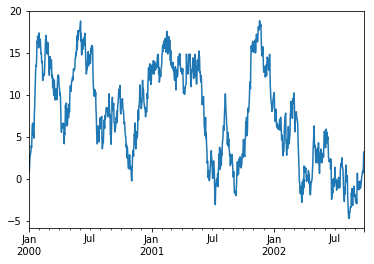

In [347]:
ts.plot()

In [348]:
# On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])
#df = df.cumsum()
#plt.figure()
#df.plot()
#plt.legend(loc = 'best')

In [349]:
df = df.cumsum()

In [350]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

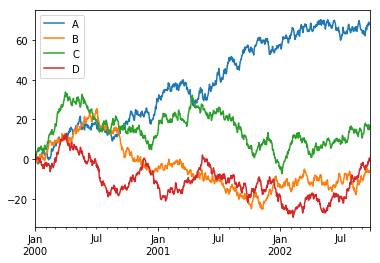

In [351]:
df.plot(label='上海')

No handles with labels found to put in legend.


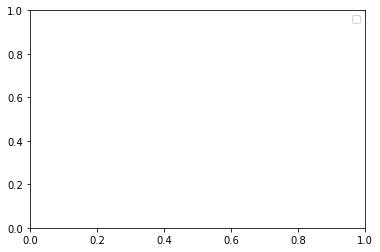

In [352]:
plt.legend(loc = 'best')

12. Getting Data In/Out

In [353]:
# CSV
# Writing to a csv file.
df.to_csv('foo.csv')

In [354]:
# Reading from a csv file.
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.249967,0.138495,-0.631811,-0.060390
1,2000-01-02,-1.887734,-0.826900,1.428538,0.525524
2,2000-01-03,-1.366987,-1.235102,2.364856,-0.212539
3,2000-01-04,-1.419099,-0.779684,0.066605,0.693667
4,2000-01-05,-1.400571,-1.130118,2.619220,0.125004
5,2000-01-06,-0.237371,-1.709392,3.823484,0.757886
6,2000-01-07,0.023589,-1.734974,3.908545,0.353321
7,2000-01-08,-1.809632,-0.963580,4.567307,1.022694
8,2000-01-09,-2.335521,-1.086712,3.903434,0.592412
9,2000-01-10,-1.141362,-0.088263,5.536349,0.666648


In [355]:
# HDF5
# Writing to a HDF5 Store.

#df.to_hdf('foo.h5','df')

In [359]:
# Excel
# Writing to an excel file.
#import xlrd
import xlwt
df.to_excel('foo.xlsx',sheet_name='Sheet1')

ImportError: No module named expat; use SimpleXMLTreeBuilder instead

13. Gotchas

In [ ]:
# If you are attempting to perform an operation you might see an exception like:
if pd.Series([False,True,False]):
    print("I am true")

14. groupby分组与agg聚合(aggregation)

In [18]:
import pandas as pd
# 构造数据 
df = pd.DataFrame({'Country':['China','China', 'India', 'India', 'America', 'Japan', 'China', 'India'], 
                   'Income':[10000, 10000, 5000, 5002, 40000, 50000, 8000, 5000],
                    'Age':[5000, 4321, 1234, 4010, 250, 250, 4500, 4321]})

In [19]:
df

,Country,Income,Age
0,China,10000,5000
1,China,10000,4321
2,India,5000,1234
3,India,5002,4010
4,America,40000,250
5,Japan,50000,250
6,China,8000,4500
7,India,5000,4321


分组

In [20]:
# 单列分组
data_gb1 = df.groupby('Country')
for index, data in data_gb1:
    print(index)
    print(data)

America
   Country  Income  Age
4  America   40000  250
China
  Country  Income   Age
0   China   10000  5000
1   China   10000  4321
6   China    8000  4500
India
  Country  Income   Age
2   India    5000  1234
3   India    5002  4010
7   India    5000  4321
Japan
  Country  Income  Age
5   Japan   50000  250


In [21]:
# 多列分组
data_gb2 = df.groupby(['Country','Income'])
for (index1,index2), data in data_gb2:
    print((index1,index2))
    print(data)

('America', 40000)
   Country  Income  Age
4  America   40000  250
('China', 8000)
  Country  Income   Age
6   China    8000  4500
('China', 10000)
  Country  Income   Age
0   China   10000  5000
1   China   10000  4321
('India', 5000)
  Country  Income   Age
2   India    5000  1234
7   India    5000  4321
('India', 5002)
  Country  Income   Age
3   India    5002  4010
('Japan', 50000)
  Country  Income  Age
5   Japan   50000  250


聚合
    
    对分组后的数据进行聚合，默认情况下对分组后的其他列进行聚合

In [27]:
df_agg = df.groupby('Country').agg(['min','mean','max'])
df_agg

Income                        Age                   
           min          mean    max   min         mean   max
Country                                                     
America  40000  40000.000000  40000   250   250.000000   250
China     8000   9333.333333  10000  4321  4607.000000  5000
India     5000   5000.666667   5002  1234  3188.333333  4321
Japan    50000  50000.000000  50000   250   250.000000   250

In [23]:
# 对分组后的部分列进行聚合。
# 某些情况下，只需要对部分数据进行不同的聚合操作，可以通过字典来构建
num_agg = {'Age':['min','mean','max']}
df.groupby('Country').agg(num_agg)

Age                   
          min         mean   max
Country                         
America   250   250.000000   250
China    4321  4607.000000  5000
India    1234  3188.333333  4321
Japan     250   250.000000   250

In [24]:
df.groupby('Country').agg({'Age':['min','mean','max']})

Age                   
          min         mean   max
Country                         
America   250   250.000000   250
China    4321  4607.000000  5000
India    1234  3188.333333  4321
Japan     250   250.000000   250

In [26]:
num_agg = {'Age':['min','mean','max'],'Income':['min','max']}
df.groupby('Country').agg(num_agg)

Age                    Income       
          min         mean   max    min    max
Country                                       
America   250   250.000000   250  40000  40000
China    4321  4607.000000  5000   8000  10000
India    1234  3188.333333  4321   5000   5002
Japan     250   250.000000   250  50000  50000